![aaron judge](judge_wide.jpg)

This is Aaron Judge. Judge is one of the physically largest players in Major League Baseball standing 6 feet 7 inches (2.01 m) tall and weighing 282 pounds (128 kg). He also hit one of the hardest home runs ever recorded. How do we know this? Statcast.

Statcast is a state-of-the-art tracking system that uses high-resolution cameras and radar equipment to measure the precise location and movement of baseballs and baseball players. Introduced in 2015 to all 30 major league ballparks, Statcast data is revolutionizing the game. Teams are engaging in an "arms race" of data analysis, hiring analysts left and right in an attempt to gain an edge over their competition.

In this project, you're going to wrangle, analyze, and visualize Statcast historical data to compare Mr. Judge and another (extremely large) teammate of his, Giancaro Stanton. They are similar in a lot of ways, one being that they hit a lot of home runs. Stanton and Judge led baseball in home runs in 2017, with 59 and 52, respectively. These are exceptional totals - the player in third "only" had 45 home runs.

Stanton and Judge are also different in many ways. Let's find out how they compare!

**The Data**

There are two CSV files, `judge.csv` and `stanton.csv`, both of which contain Statcast data for 2015-2017. Each row represents one pitch thrown to a batter. 

**Custom Functions**

Two functions have also been provided for you to visualize home rome zones
- `assign_x_coord`: Assigns an x-coordinate to Statcast's strike zone numbers.
- `assign_y_coord`: Assigns a y-coordinate to Statcast's strike zone numbers.

![](zone.png)

In [28]:
# Run this cell to begin
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Aaron Judge's Statcast data
judge = pd.read_csv('judge.csv')

# Load Giancarlo Stanton's Statcast data
stanton = pd.read_csv('stanton.csv')

# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

# Custom Functions
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3
    
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1
    
# Display the last five rows of the Aaron Judge file
judge.tail()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
3431,CH,2016-08-13,85.6,-1.9659,5.9113,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,0,2016,-0.379108,0.370567,0.739,1.442,NaN,NaN,NaN,0,5,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_144259,6.960,-124.371,-4.756,-2.821,23.634,-30.220,3.93,1.82,NaN,NaN,NaN,84.459,1552.0,5.683,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8144,0.00,0.000,NaN,NaN,NaN,NaN,NaN,36,1
3432,CH,2016-08-13,87.6,-1.9318,5.9349,Aaron Judge,592450,542882,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (1) on a fly ball to center...,R,R,R,NYY,TB,X,NaN,fly_ball,1,2,2016,-0.295608,0.320400,-0.419,3.273,NaN,NaN,NaN,2,2,Bot,130.45,14.58,NaN,NaN,571912.0,NaN,160813_135833,4.287,-127.452,-0.882,-1.972,24.694,-30.705,4.01,1.82,446.0,108.8,27.410,86.412,1947.0,5.691,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8064,0.98,1.937,2.0,1.0,0.0,3.0,6.0,14,4
3433,CH,2016-08-13,87.2,-2.0285,5.8656,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,2,2016,-0.668575,0.198567,0.561,0.960,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135815,7.491,-126.665,-5.862,-6.393,21.952,-32.121,4.01,1.82,NaN,NaN,NaN,86.368,1761.0,5.721,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.7770,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,3
3434,CU,2016-08-13,79.7,-1.7108,6.1926,Aaron Judge,592450,542882,NaN,foul,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,1,2016,0.397442,-0.614133,-0.803,2.742,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135752,1.254,-116.062,0.439,5.184,21.328,-39.866,4.01,1.82,9.0,55.8,-24.973,77.723,2640.0,5.022,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,55.4756,0.00,0.000,NaN,NaN,NaN,NaN,1.0,14,2
3435,FF,2016-08-13,93.2,-1.8476,6.0063,Aaron Judge,592450,542882,NaN,called_strike,NaN,NaN,NaN,NaN,8.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,0,2016,-0.823050,1.623300,-0.273,2.471,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135736,5.994,-135.497,-6.736,-9.360,26.782,-13.446,4.01,1.82,NaN,NaN,NaN,92.696,2271.0,6.068,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.4299,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,1


In [29]:
# Start coding here. Use as many cells as you like!

# **Count Event Types in 2017**
I want to understand the distribution of events (like hits, strikeouts, walks, etc.) for each player in the 2017 season.

In [30]:
# Filter the data to only include events from 2017
judge_2017 = judge[judge['game_year'] == 2017]
stanton_2017 = stanton[stanton['game_year'] == 2017]

# Count how many times each type of event occurred
judge_events_2017 = judge_2017['events'].value_counts()
stanton_events_2017 = stanton_2017['events'].value_counts()

# Display results
print("Judge Events in 2017:\n", judge_events_2017)
print("\nStanton Events in 2017:\n", stanton_events_2017)

Judge Events in 2017:
 strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
force_out                     11
intent_walk                   11
hit_by_pitch                   5
sac_fly                        4
fielders_choice_out            4
field_error                    4
triple                         3
strikeout_double_play          1
Name: events, dtype: int64

Stanton Events in 2017:
 field_out                    239
strikeout                    161
single                        77
walk                          72
home_run                      59
double                        32
intent_walk                   13
grounded_into_double_play     13
force_out                      7
hit_by_pitch                   7
field_error                    5
sac_fly                        3
fielders_choice_out            2


# **Visualize Launch Speed vs Launch Angle**
To compare who hits lower (launch angle) and harder (launch speed) home runs, you'll use a scatter plot to see the relationship between angle and speed for each player.

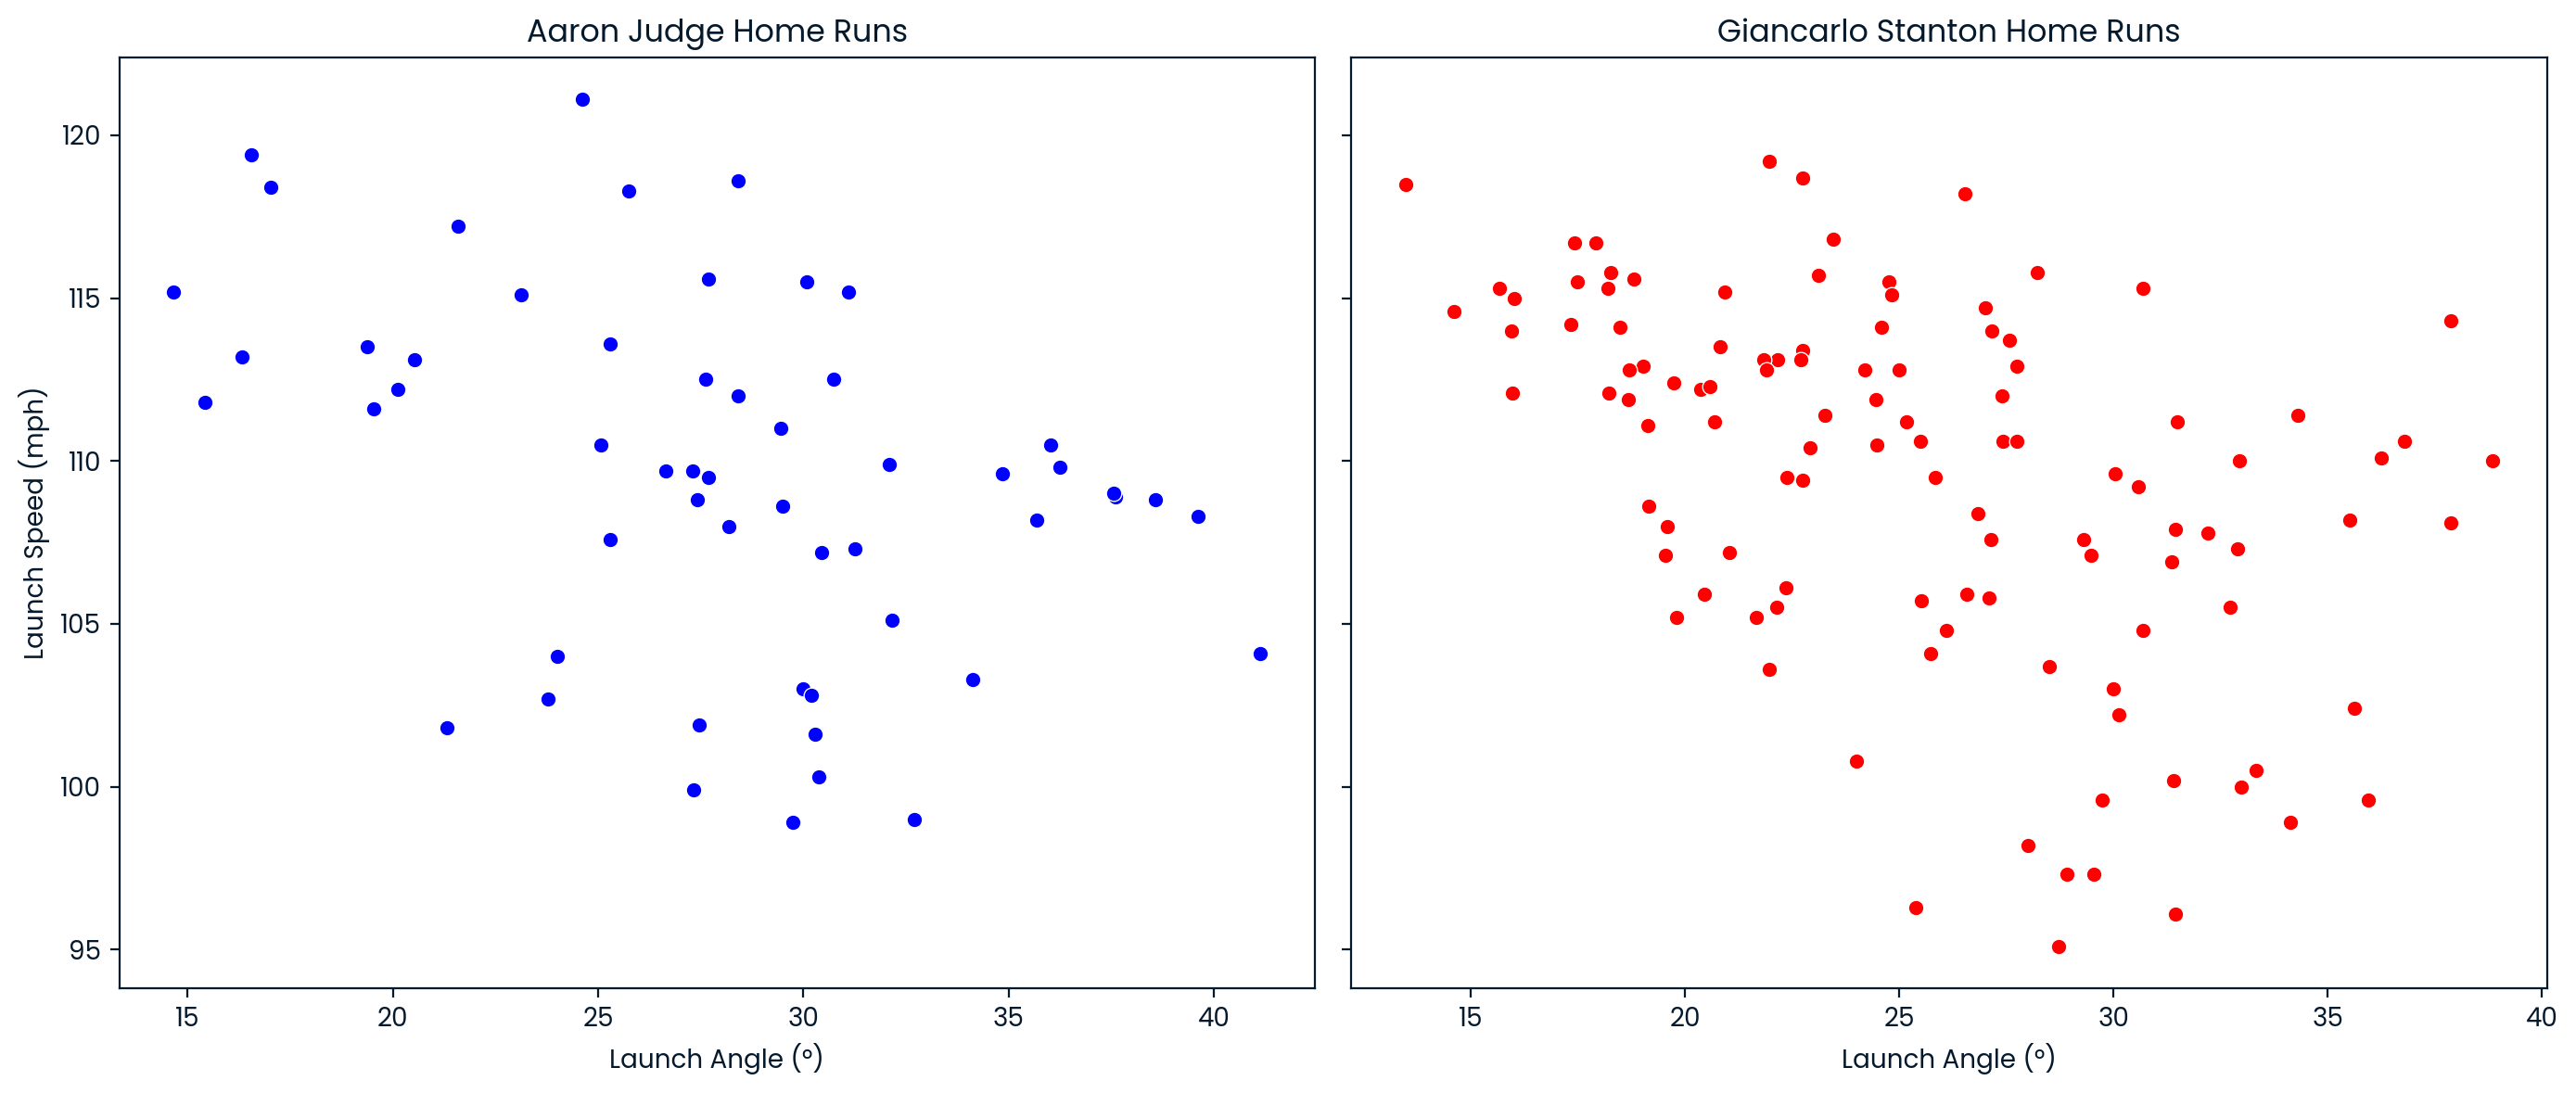

In [31]:
# Filter data to only include home runs
judge_hr = judge[judge['events'] == 'home_run'].copy()
stanton_hr = stanton[stanton['events'] == 'home_run'].copy()

# Create side-by-side scatter plots
fig1, ax1 = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Judge's home runs
sns.scatterplot(data=judge_hr, x='launch_angle', y='launch_speed', ax=ax1[0], color='blue')
ax1[0].set_title('Aaron Judge Home Runs')
ax1[0].set_xlabel('Launch Angle (°)')
ax1[0].set_ylabel('Launch Speed (mph)')

# Stanton's home runs
sns.scatterplot(data=stanton_hr, x='launch_angle', y='launch_speed', ax=ax1[1], color='red')
ax1[1].set_title('Giancarlo Stanton Home Runs')
ax1[1].set_xlabel('Launch Angle (°)')

plt.tight_layout()
plt.show()

# **Compare Averages of Launch Speed & Angle**
To determine who hits home runs that are on average lower and harder, calculate the mean values and compare.

In [32]:
# Calculate medians instead of means
judge_median = judge_hr[['launch_speed', 'launch_angle']].median()
stanton_median = stanton_hr[['launch_speed', 'launch_angle']].median()

# Decide who hits home runs lower and harder based on medians
player_hr = "Stanton" if (
    stanton_median['launch_angle'] < judge_median['launch_angle'] and
    stanton_median['launch_speed'] > judge_median['launch_speed']
) else "Judge"

print("Player who hit home runs lower and harder:", player_hr)

Player who hit home runs lower and harder: Stanton


# **Compare Pitch Velocity (release_speed)**
You want to know who hits home runs off faster pitches. Compare pitch speeds using a boxplot and median values.



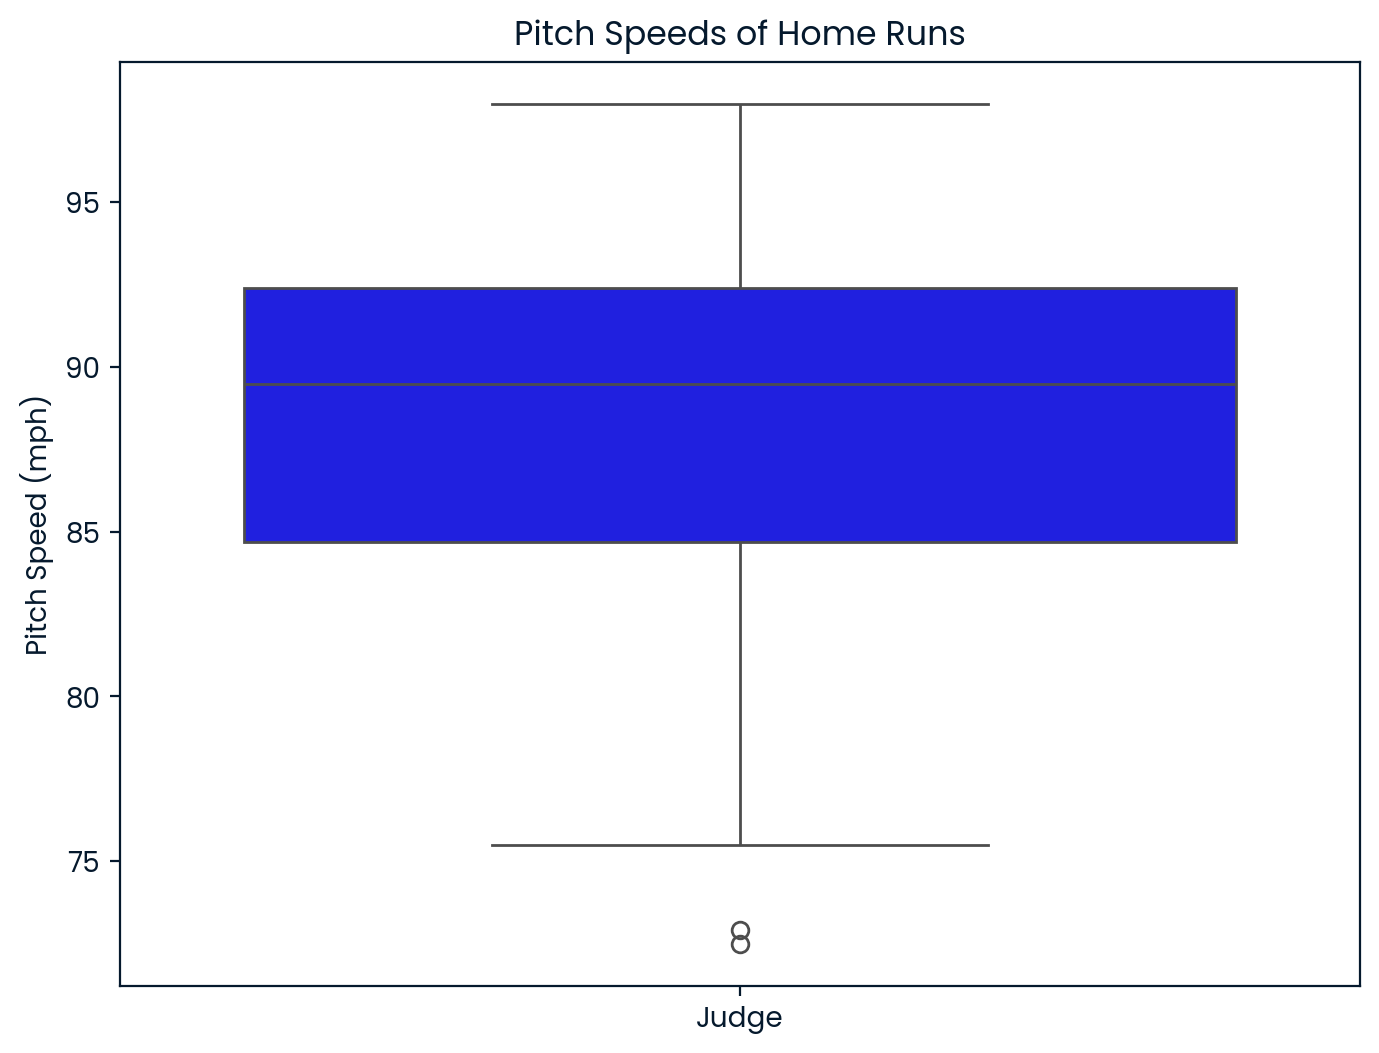

Player who hit home runs off faster pitches: Judge


In [33]:
# Boxplot for pitch speed of home runs
fig2, ax2 = plt.subplots(figsize=(8, 6))
sns.boxplot(data=[judge_hr['release_speed'], stanton_hr['release_speed']], palette=['blue', 'red'])
ax2.set_xticklabels(['Judge', 'Stanton'])
ax2.set_ylabel('Pitch Speed (mph)')
ax2.set_title('Pitch Speeds of Home Runs')
plt.show()

# Calculate median pitch speed
judge_median_speed = judge_hr['release_speed'].median()
stanton_median_speed = stanton_hr['release_speed'].median()

# Determine who faced faster pitches
player_fast = "Stanton" if stanton_median_speed > judge_median_speed else "Judge"
print("Player who hit home runs off faster pitches:", player_fast)

# **2D Histogram of Strike Zone Home Runs**
To visually analyze where in the strike zone players are most likely to hit home runs, build a heatmap using strike zone coordinates.


In [34]:
# Filter to only zones 1-9 (in the strike zone)
judge_strike_hr = judge_hr[judge_hr['zone'].isin([1,2,3,4,5,6,7,8,9])].copy()
stanton_strike_hr = stanton_hr[stanton_hr['zone'].isin([1,2,3,4,5,6,7,8,9])].copy()

# Assign coordinates using your custom functions
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis=1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis=1)

stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord, axis=1)
stanton_strike_hr['zone_y'] = stanton_strike_hr.apply(assign_y_coord, axis=1)


# **Plot 2D Strike Zone Histograms**
To visualize which areas of the strike zone resulted in the most home runs for each player.

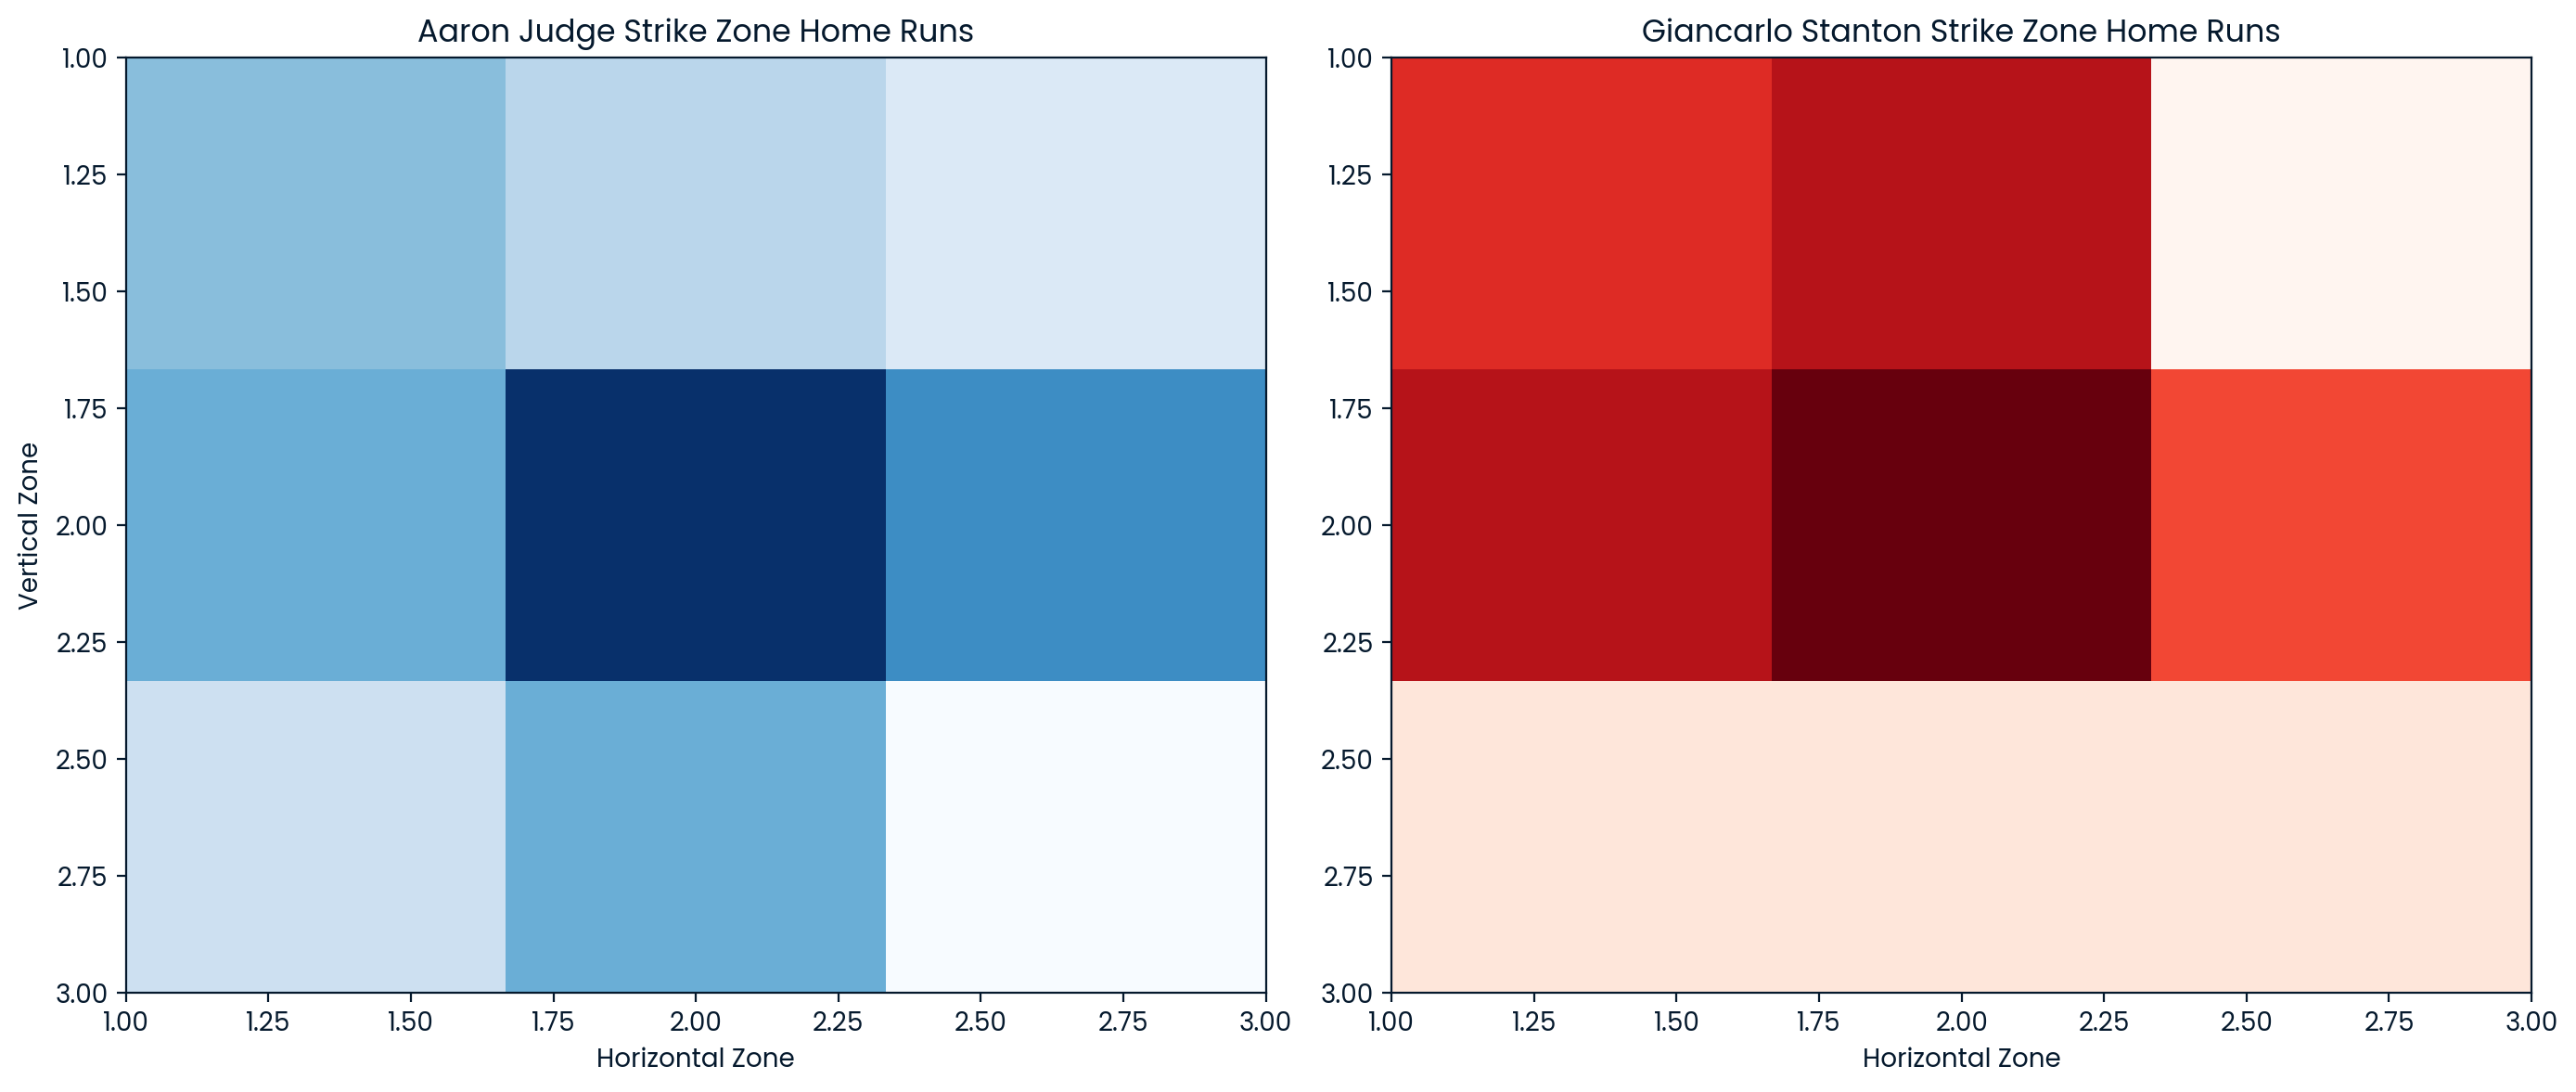

In [35]:
# Plot histograms for both players
fig3, ax3 = plt.subplots(1, 2, figsize=(14, 6))

# Judge heatmap
ax3[0].hist2d(judge_strike_hr['zone_x'], judge_strike_hr['zone_y'], bins=[3, 3], cmap='Blues')
ax3[0].set_title('Aaron Judge Strike Zone Home Runs')
ax3[0].set_xlabel('Horizontal Zone')
ax3[0].set_ylabel('Vertical Zone')
ax3[0].invert_yaxis()

# Stanton heatmap
ax3[1].hist2d(stanton_strike_hr['zone_x'], stanton_strike_hr['zone_y'], bins=[3, 3], cmap='Reds')
ax3[1].set_title('Giancarlo Stanton Strike Zone Home Runs')
ax3[1].set_xlabel('Horizontal Zone')
ax3[1].invert_yaxis()

plt.tight_layout()
plt.show()